# Linear Regression - Iris Dataset From Scikit-learn

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
import numpy as np

## Exploratory data analysis

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target = pd.DataFrame(data= iris.target, columns= ['species_code'])
target

,species_code
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [4]:
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [5]:
target['species'] = target['species_code'].apply(converter)
df = pd.concat([df, target], axis= 1)
df.shape

(150, 6)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


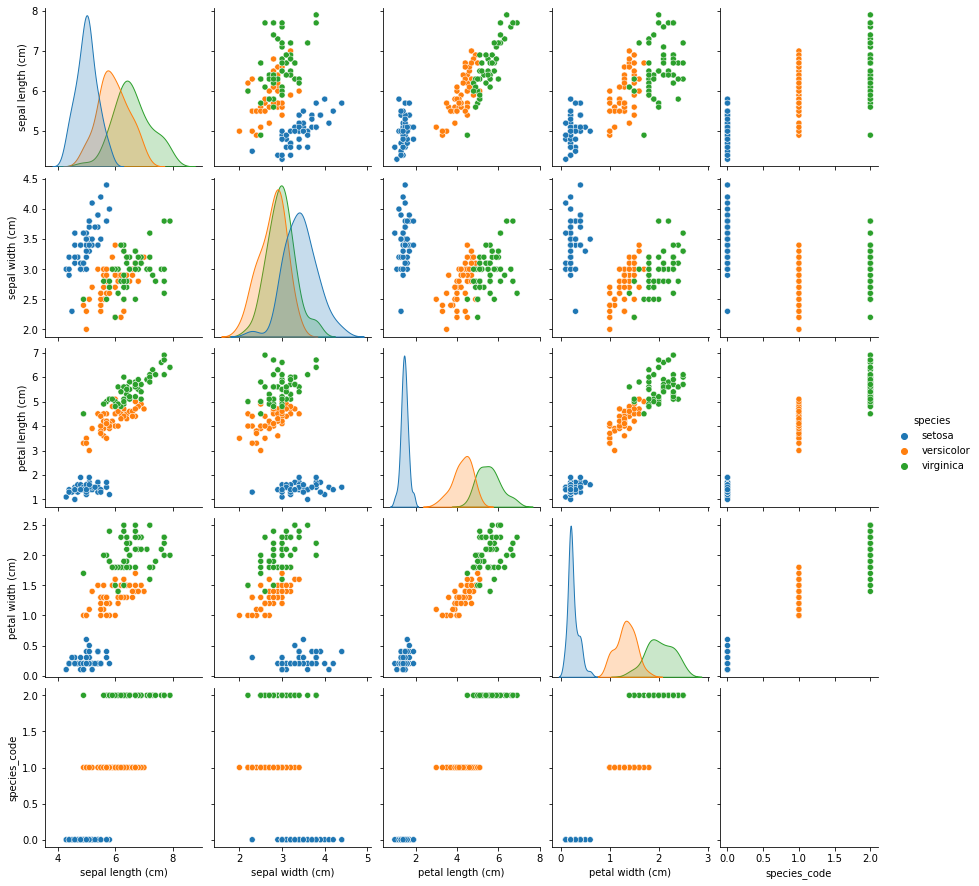

In [8]:
sns.pairplot(df, hue= 'species')

## Model Building

In [9]:
# declare features and target
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
y = df['species_code']
X = df[features]
print(y.shape, X.shape)

(150,) (150, 4)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state=13)

In [11]:
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [12]:
mymodel.intercept_
mymodel.coef_

array([-0.09715089, -0.04994201,  0.17248974,  0.72449119])

In [13]:
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}'
print("Regression Equation: ", equation) 

Regression Equation:  y = 0.198 + -0.0972*sepal length (cm) + -0.0499*sepal width (cm) + 0.1725*petal length (cm) + 0.7245*petal width (cm)


In [14]:
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[1, 1, 0, 2, 2]
[1, 1, 0, 1, 1]


## Model Evaluation

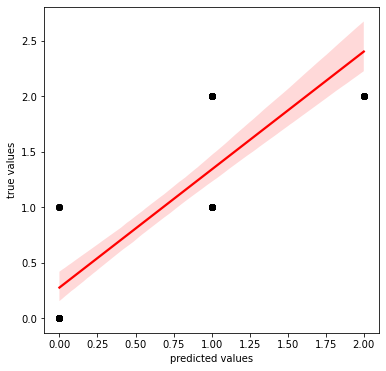

In [15]:
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [16]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.54

In [17]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

0.565685424949238

In [18]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

0.83
0.57
improvement: -0.27


## Test the Prediction

In [19]:
def iris_lr_function(sepal_length,sepal_width,petal_length,petal_width):
    checksum=0
    for var in [sepal_length,sepal_width,petal_length,petal_width]:
        if (sepal_length<4.3)|(sepal_length>7.9):
            checksum+=1
        if (sepal_width<2)|(sepal_width>4.4):
            checksum+=1
        if (petal_length<1)|(petal_length>6.9):
            checksum+=1
        if (petal_width<0.1)|(petal_width>2.5):
            checksum+=1
        if checksum>0:
            return "Please provide adequate inputs"
        else:
            y = round([0.198 + -0.0972*sepal_length + -0.0499*sepal_width + 0.1725*petal_length + 0.7245*petal_width][0])
            return y

In [20]:
sepal_length=4.9
sepal_width=3
petal_length=1.4
petal_width=0.2
y=iris_lr_function(sepal_length,sepal_width,petal_length,petal_width)
converter(y)

'setosa'